In [9]:
from aeon.forecasting.compose import make_reduction
from aeon.datasets import load_airline
from sklearn.ensemble import GradientBoostingRegressor
from aeon.utils.plotting import plot_series
import numpy as np
import pandas as pd
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.compose import ForecastX
from aeon.forecasting.var import VAR

In [10]:
y = load_airline()

In [11]:
random_data = np.random.random((y.shape[0], 3))
cols = [f'X{i+1}' for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.429656,0.003547,0.612649
1949-02,0.754040,0.062877,0.141622
1949-03,0.405962,0.882518,0.618521
1949-04,0.741945,0.985327,0.230981
1949-05,0.643403,0.866944,0.472785


In [12]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [13]:
fh = np.arange(len(y_test)) + 1

In [14]:
regressor = GradientBoostingRegressor(max_depth=None)
forecasterTabular = make_reduction(regressor, window_length=20, strategy="recursive")


In [15]:
forecaster = ForecastX(  
    forecaster_X=VAR(),
    forecaster_y=forecasterTabular,
)

In [16]:
forecaster.fit(y_train, X=X_train, fh=fh)
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

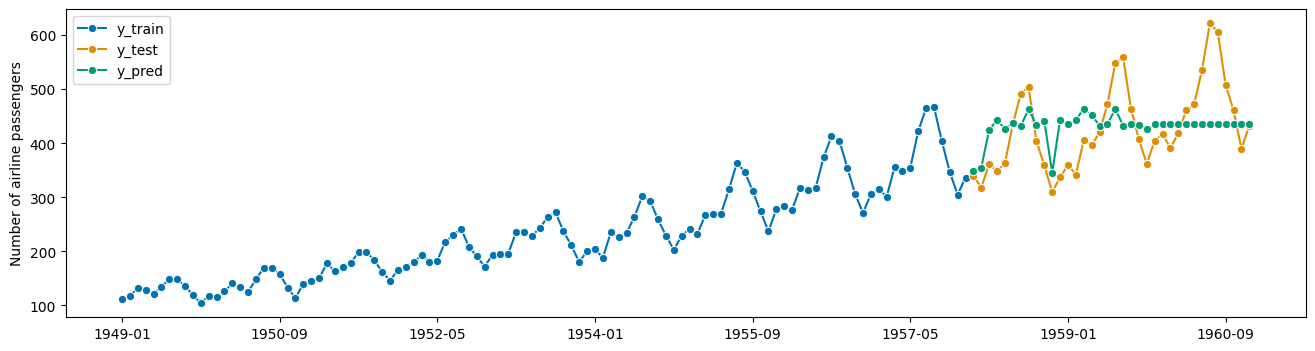

In [17]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])